In [11]:
from sklearn.mixture import GaussianMixture as GMM
import numpy as np
import matplotlib.pyplot as plt

In [8]:
np.random.seed(42)
K=3
batch=300
m=K*batch
mu_list=[(3,1),(8,10),(12,2)]
Sigma_list=[
    np.array([[1,-0.5],[-0.5,1]]),
    np.array([[2,0.8],[0.8,2]]),
    np.eye(2)
]
y=np.empty(m)
for k in range(K):
    y[batch*k:batch*(k+1)]=k
samples=[]
for k in range(K):
    mu=mu_list[k]
    Sigma=Sigma_list[k]
    samples.append(
        np.random.multivariate_normal(mu,Sigma,size=batch)
    )
samples=np.concatenate(samples)

In [99]:
print('-'*10+f'真实模型 (K={K})'+'-'*10)
print('mu:')
for k in range(K):
    print(f'\t{k+1}: {mu_list[k]}')
print('Sigma:')
for k in range(K):
    print(f'{k+1}:\n{Sigma_list[k]}')

y_pred_list=[]
aic_list=[]
bic_list=[]
for k in range(2,7):
    gmm=GMM(n_components=k,random_state=42).fit(samples)
    y_pred=gmm.predict(samples)
    parameters=gmm._get_parameters()
    mu_pred=parameters[0]
    Sigma_pred=parameters[1:]
    aic=gmm.aic(samples)
    bic=gmm.aic(samples)
    print('-'*10+f'GMM (K={k})'+'-'*10)
    print(f'AIC: {aic}\nBIC: {bic}')
    print('mu:')
    for i in range(k):
        print(f'\t{i+1}: {mu_pred[i]}')
    print('Sigma:')
    for i in range(K):
        print(f'{i+1}:\n{Sigma_pred[i]}')
    y_pred_list.append(y_pred)
    aic_list.append(aic)
    bic_list.append(bic)

----------真实模型 (K=3)----------
mu:
	1: (3, 1)
	2: (8, 10)
	3: (12, 2)
Sigma:
1:
[[ 1.  -0.5]
 [-0.5  1. ]]
2:
[[2.  0.8]
 [0.8 2. ]]
3:
[[1. 0.]
 [0. 1.]]
----------GMM (K=2)----------
AIC: 8379.62928859989
BIC: 8379.62928859989
mu:
	1: 0.3333316320757424
	2: 0.6666683679242578
Sigma:
1:
[[ 3.01180149  0.95843791]
 [10.03979844  6.0644936 ]]
2:
[[[ 0.96196841 -0.47728883]
  [-0.47728883  0.95336234]]

 [[ 5.6563478  -7.61046148]
  [-7.61046148 17.33549937]]]
3:
[[[1.01957598 0.58613381]
  [0.         1.18134383]]

 [[0.42046703 0.50509521]
  [0.         0.37540354]]]
----------GMM (K=3)----------
AIC: 7439.154338672208
BIC: 7439.154338672208
mu:
	1: 0.33333318195242845
	2: 0.33333370968468
	3: 0.3333331083628915
Sigma:
1:
[[ 3.01181699  0.95843178]
 [ 8.03552062 10.04005765]
 [12.04409704  2.08895224]]
2:
[[[ 0.96200883 -0.47730048]
  [-0.47730048  0.95335974]]

 [[ 2.22424274  0.81433577]
  [ 0.81433577  1.99182798]]

 [[ 1.05407902 -0.09910501]
  [-0.09910501  1.06902623]]]
3:
[[[ 1.

In [103]:
gmm._get_parameters()[1].shape

(6, 2)

C:\Users\19317\AppData\Local\Temp\ipykernel_9584\1352041093.py:22: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.savefig('../figures/3.png')
c:\Users\19317\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


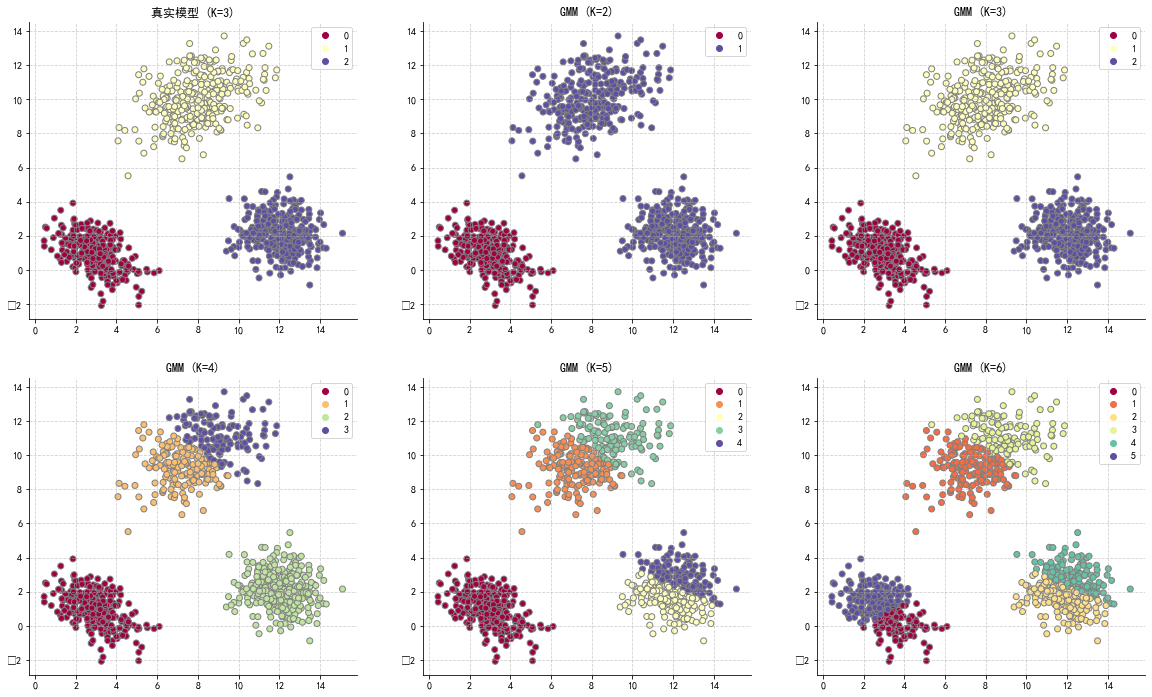

In [70]:
plt.rcParams['font.sans-serif'] = ['SimHei']

fig, axes = plt.subplots(2,3,figsize = (20,12))
axes=axes.ravel()
for i in range(6):
    ax=axes[i]
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(True, linestyle="--", alpha=0.6)
    if i == 0:
        y_pred=y
        ax.set_title(f'真实模型 (K={K})')
        labels=range(K)
    else:
        y_pred=y_pred_list[i-1]
        ax.set_title(f'GMM (K={i+1})')
        labels=range(i+1)
    scatter=ax.scatter(samples[:,0],samples[:,1],
                c=y_pred,cmap=plt.cm.Spectral,
                edgecolors='grey',)
    ax.legend(handles=scatter.legend_elements()[0],labels=labels)
plt.savefig('../figures/3.png')
plt.show()

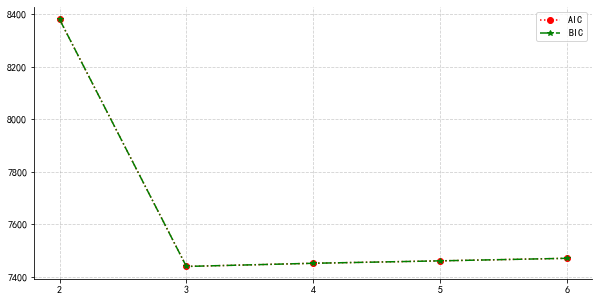

In [95]:
plt.figure(figsize = (10,5))
ax=plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle="--", alpha=0.6)
plt.plot(aic_list,'ro:',bic_list,'g*-.')
plt.xticks(ticks=range(5),labels=range(2,7))
plt.legend(['AIC','BIC'])
plt.savefig('../figures/3_metrics.png')
plt.show()